In [9]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_df = pd.read_csv("../data/train.csv")
val_df = pd.read_csv("../data/validation.csv")
test_df = pd.read_csv("../data/test.csv")

### Evaluating Naive Bayes on Validation Data

In [7]:
BNB = make_pipeline(CountVectorizer(), BernoulliNB())
BNB.fit(train_df["Stemmed"], train_df["Result_Bin"])

# Predict on the test set
y_pred = BNB.predict(val_df["Stemmed"])
y_val = val_df["Result_Bin"]
# Calculate F1
f1 = f1_score(y_val, y_pred)
print("F1 Score:", round(f1,3))
# Calculate Precision
precision = precision_score(y_val, y_pred)
print("Precision:", round(precision, 3))
# Calculate recall
recall = recall_score(y_val, y_pred)
print("Recall:", round(recall, 3))

F1 Score: 0.697
Precision: 0.623
Recall: 0.79


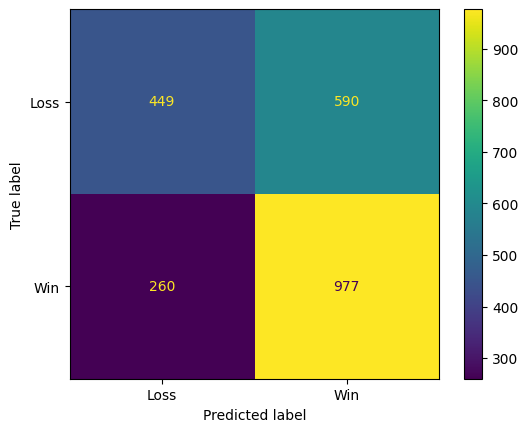

In [11]:
conf_matrix = confusion_matrix(y_val, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ["Loss","Win"])
cm_display.plot()

### Evaluating Naive Bayes on Testing Data

In [13]:
# Predict on the test set
y_pred = BNB.predict(test_df["Stemmed"])
y_test = test_df["Result_Bin"]
# Calculate F1
f1 = f1_score(y_test, y_pred)
print("F1 Score:", round(f1,3))
# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision:", round(precision, 3))
# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall:", round(recall, 3))

F1 Score: 0.702
Precision: 0.623
Recall: 0.803


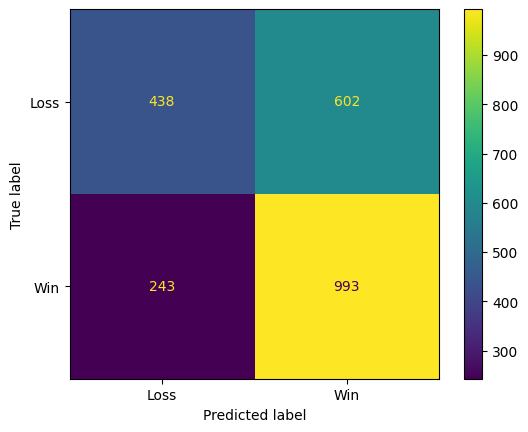

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ["Loss", "Win"])
cm_display.plot()